In [124]:
import warnings
warnings.filterwarnings('ignore')
import keras
import matplotlib.pyplot as plt # for plotting
import os 
import cv2 
import numpy as np
from keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # For data augmentation (optional)
from tensorflow.keras.utils import to_categorical  # For one-hot encoding

In [125]:
CATEGORIES = ["01_palm", '02_l','03_fist','04_fist_moved','05_thumb','06_index','07_ok','08_palm_moved','09_c','10_down']
IMG_SIZE = 50
data_path = "C:/Users/USER/Documents/ProdigyInfotech/Task_04/input/leapGestRecog/leapGestRecog"

In [126]:
image_data = []
for dr in os.listdir(data_path):
    for category in CATEGORIES:
        class_index = CATEGORIES.index(category)
        path = os.path.join(data_path, dr, category)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                image_data.append([cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE)), class_index])
            except Exception as e:
                pass
print(image_data[0])

[array([[5, 4, 4, ..., 3, 4, 2],
       [5, 4, 5, ..., 3, 3, 3],
       [4, 5, 4, ..., 4, 5, 3],
       ...,
       [4, 5, 5, ..., 5, 5, 5],
       [5, 5, 6, ..., 5, 7, 4],
       [4, 7, 5, ..., 5, 4, 4]], dtype=uint8), 0]


In [127]:
import random
random.shuffle(image_data)

In [128]:
input_data = []
label = []
for X, y in image_data:
    input_data.append(X)
    label.append(y)

In [129]:
label[:10]

[5, 5, 2, 8, 1, 6, 7, 8, 3, 7]

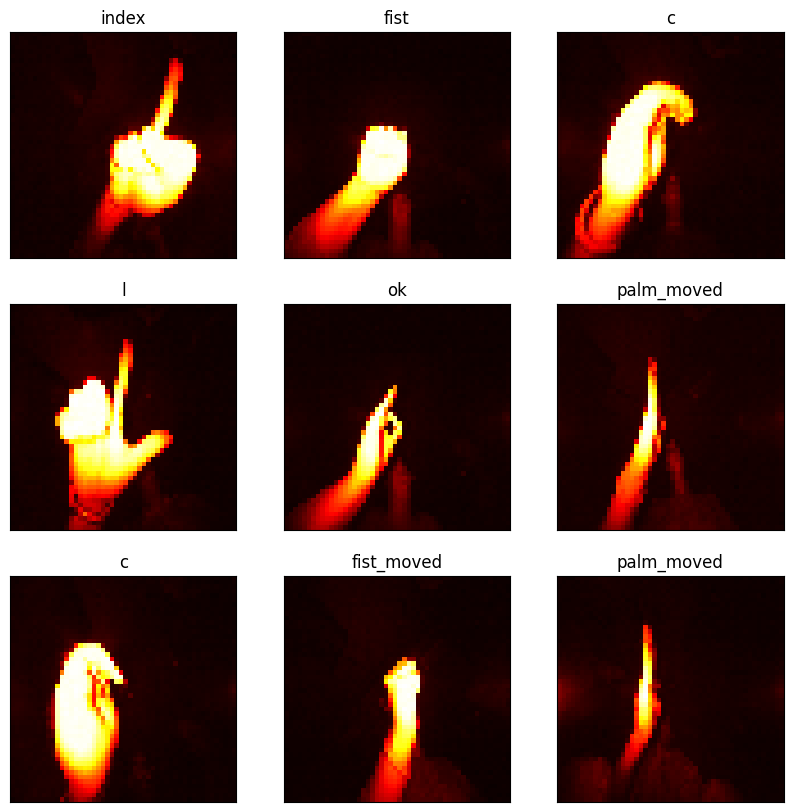

In [130]:
plt.figure(1, figsize=(10,10))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(image_data[i][0], cmap='hot')
    plt.xticks([])
    plt.yticks([])
    plt.title(CATEGORIES[label[i]][3:])
plt.show()

In [131]:
input_data = np.array(input_data)
label = np.array(label)
input_data = input_data/255.0
input_data.shape

(20000, 50, 50)

In [132]:
X,y=make_multilabel_classification(n_samples=500,n_features=4,n_classes=2,n_labels=3,random_state=1)

In [133]:
X

array([[ 9., 12.,  6., 12.],
       [ 5.,  2., 12., 22.],
       [15.,  5., 12., 11.],
       ...,
       [ 5., 10., 15., 28.],
       [ 0.,  8., 16., 27.],
       [ 6.,  9., 13., 22.]])

In [134]:
y

array([[0, 0],
       [1, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 1],
       [0, 1],
       [1, 1],
       [1, 0],
       [1, 1],
       [0, 1],
       [0, 1],
       [1, 1],
       [0, 1],
       [0, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 0],
       [1, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 0],
       [1, 1],
       [1, 0],
       [1, 0],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 0],
       [0, 0],
       [1, 0],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 0],
       [1, 1],
       [0, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1,

<function matplotlib.pyplot.show(close=None, block=None)>

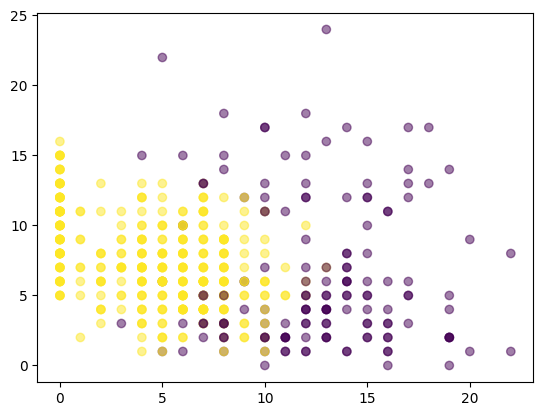

In [135]:
rng=np.random.RandomState(1)
colors=rng.rand(1000)
plt.scatter(X[:,0:1],X[:,1:2],c=y[:,0],alpha=0.5,cmap='viridis')
plt.show

In [136]:
X=(X-X.min())/(X.max()-X.min())
X

array([[0.20454545, 0.27272727, 0.13636364, 0.27272727],
       [0.11363636, 0.04545455, 0.27272727, 0.5       ],
       [0.34090909, 0.11363636, 0.27272727, 0.25      ],
       ...,
       [0.11363636, 0.22727273, 0.34090909, 0.63636364],
       [0.        , 0.18181818, 0.36363636, 0.61363636],
       [0.13636364, 0.20454545, 0.29545455, 0.5       ]])

In [137]:
label = keras.utils.to_categorical(label, num_classes=10)
label[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [138]:
X_train, X_test, y_train, y_test = train_test_split(input_data, label, test_size = 0.10, random_state=0)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((18000, 50, 50), (18000, 10), (2000, 50, 50), (2000, 10))

In [139]:
model = keras.models.Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (IMG_SIZE, IMG_SIZE, 1)))
model.add(Activation('relu'))

model.add(Conv2D(filters = 32, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 64, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
         optimizer = 'rmsprop',
         metrics = ['accuracy'])

In [140]:
model.fit(X_train, y_train, epochs = 7, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/7
563/563 ━━━━━━━━━━━━━━━━━━━━ 27s 46ms/step - accuracy: 0.7496 - loss: 0.7332 - val_accuracy: 0.9990 - val_loss: 0.0058
Epoch 2/7
563/563 ━━━━━━━━━━━━━━━━━━━━ 25s 44ms/step - accuracy: 0.9950 - loss: 0.0164 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 3/7
563/563 ━━━━━━━━━━━━━━━━━━━━ 25s 44ms/step - accuracy: 0.9981 - loss: 0.0072 - val_accuracy: 0.9995 - val_loss: 0.0024
Epoch 4/7
563/563 ━━━━━━━━━━━━━━━━━━━━ 25s 45ms/step - accuracy: 0.9993 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 2.7592e-04
Epoch 5/7
563/563 ━━━━━━━━━━━━━━━━━━━━ 25s 44ms/step - accuracy: 0.9992 - loss: 0.0036 - val_accuracy: 0.9985 - val_loss: 0.0076
Epoch 6/7
563/563 ━━━━━━━━━━━━━━━━━━━━ 25s 44ms/step - accuracy: 0.9996 - loss: 0.0010 - val_accuracy: 1.0000 - val_loss: 9.5014e-07
Epoch 7/7
563/563 ━━━━━━━━━━━━━━━━━━━━ 27s 48ms/step - accuracy: 0.9995 - loss: 0.0025 - val_accuracy: 0.9995 - val_loss: 0.0011


In [159]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 48, 48, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_12 (Activation)           │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 46, 46, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_13 (Activation)           │ (None, 46, 46, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_14 (Activation)           │ (None, 21, 21, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │       1,638,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,338,582 (12.74 MB)

 Trainable params: 1,669,290 (6.37 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,669,292 (6.37 MB)

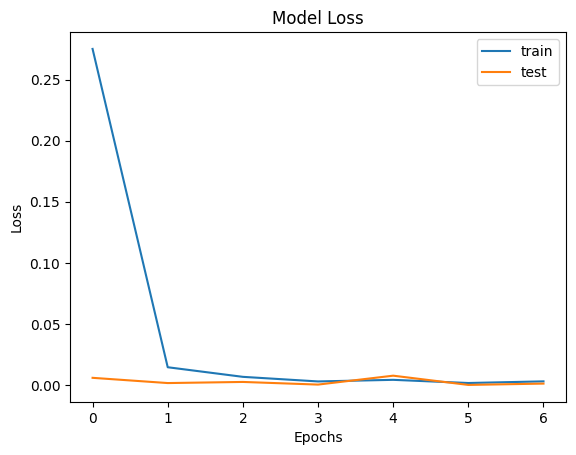

In [161]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

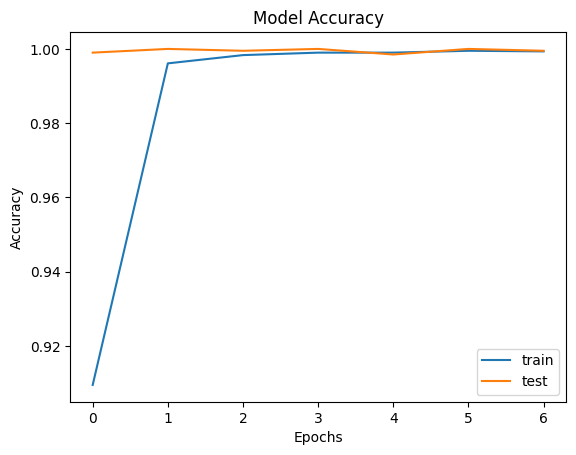

In [163]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [165]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print('Test accuracy: {:2.2f}%'.format(test_accuracy*100))

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9999 - loss: 2.2018e-04
Test accuracy: 99.95%


In [167]:
train_loss, train_accuracy = model.evaluate(X_train, y_train)

print('Train accuracy: {:2.2f}%'.format(train_accuracy*100))

563/563 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 1.0000 - loss: 2.4668e-06
Train accuracy: 100.00%


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


[]

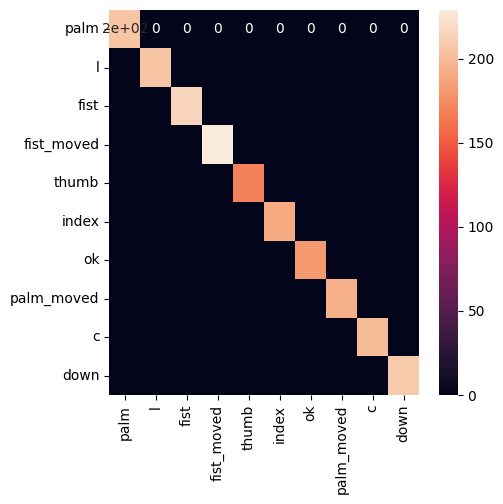

In [169]:
cat = [c[3:] for c in CATEGORIES]
plt.figure(figsize=(5,5))

cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(model.predict(X_test), axis=1))
sn.heatmap(cm, annot=True,xticklabels=cat, yticklabels=cat)
plt.plot()

563/563 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step


[]

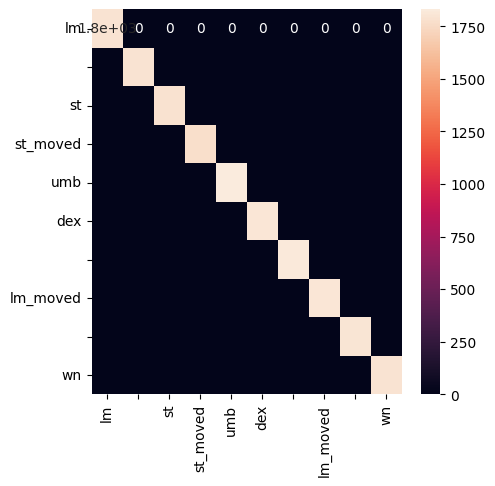

In [171]:
cat = [c[5:] for c in CATEGORIES]
plt.figure(figsize=(5,5))

cm = confusion_matrix(np.argmax(y_train, axis=1), np.argmax(model.predict(X_train), axis=1))
sn.heatmap(cm, annot=True,xticklabels=cat, yticklabels=cat)
plt.plot()